<a href="https://colab.research.google.com/github/ghanshamamrani/Deepfake/blob/main/DeepFake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 255 Final Report –– DeepFake Detection
**Team 01**

**Student name**: Ghansham Amrani, Ammara fatima , Andleeb Iqbal

---

[Data resource](https://drive.google.com/open?id=1smby8vBB0g8bNtUsQ10OdjF-4FK9k_GS)

[Youtube link](https://youtu.be/5FkJ69fE9MU)


## Motivation

The free access to large-scale public databases, together with the fast progress of deep learning techniques, particularly Generative Adversarial Networks, has led to the generation of very realistic fake content with its corresponding implications towards society in this era of fake news [1]. There are usually four types of facial manipulation: i) entire face synthesis, ii) identity swap (DeepFakes), iii) attribute manipulation, and iv) expression swap. Among them, identity swap, which is also called DeepFakes, is the most popular one. Following is an example of DeepFake, which put the face of Nichola Cage on a girl from *Man of Steel*.

Vaccari et al. have found that people are more likely to feel uncertain than to be misled by deepfakes. Still, this resulting uncertainty, in turn, reduces trust in news on social media. Imagine watching the nightly news and seeing a press conference of the Prime Minister inciting violence. But the whole thing was a deepfake. The PM could deny it, but how do you know that is not a deepfake, too. How can you know what to believe? So deepfakes may contribute toward generalized indeterminacy and cynicism, further intensifying recent challenges to online civic culture in democratic societies [2]. In the meantime, DeepFake brings the threats like identity theft and privacy breaches, for example, the face unlock feature of current smartphones, any one can use fake faces to unlock other's phone [3]. Another area of concern is financial scams. If others steal a person's face and even voice, how to tell his/her identity is a problem.

However, DeepFake also has some advantages. We can change the dialogue in a video or movie without a reshoot and creating entire videos. Deepfake technology can also be used to create AI avatars for use in training videos. Moreover, one more thing, AI-generated avatars have been used to protect the identity of interviewees in news reports like police officers or witnesses.
It is convenient to make DeepFake images and videos nowadays; a person without AI-related knowledge can easily swap the faces using the mobile device. But it is not that easy to detect the DeepFake. That is why we want to develop a model to help people notice the DeepFake quickly and efficiently.
<br></br>
![DeepFake example](https://drive.google.com/uc?id=1s4TRDLm-SIxjEMCvxF_4VaVDBxnOMOtg)








## Approaches

To better understand DeepFake, a brief overview of creating a deepfake images/videos is introduced.  The first attempt of deepfake creation was FakeApp, developed by a Reddit user using an autoencoder-decoder pairing structure. The autoencoder extracts latent features of face images, and the decoder is used to reconstruct the face images in that method. To swap faces between source images and target images, there is a need of two encoder-decoder pairs where each pair is used to train on an image set, and the encoder’s parameters are shared between two network pairs, that is having the same encoder network. This strategy enables the common encoder to find and learn the similarity between two sets of face images.  The figure below shows a deepfake creation process where the feature set of face A is connected with the decoder B to reconstruct face B from the original face A. This approach is applied in several works such as DeepFaceLab, DFaker, DeepFake tf (tensorflowbased deepfakes) [4].

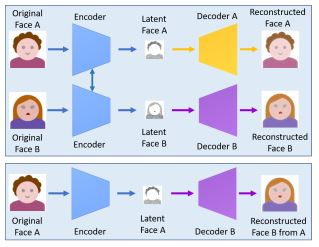

DeepFake detection can be categorized into three different areas: <br>
(1) Hand-crafted features - An authentic video of a person of interest will be used as training data.  The facial and head movement are extracted as facial action units, and the 3D distances between certain mouth landmarks are collected.  These distinct facial expressions and movements can be used to detect deepfake.  Another way is to analyze a person’s blinking patterns, eye aspect ratio for a closed eye and open eye) to spot fake points of interest; this approach can be done with SVM. <br>
(2) Learning based features – Employ CNN to do binary detection.  The facial region from the input image is pre-extract (and extract a center-crop or resize for certain methods) and uses the various CNN methods to detect forgery. Almost all approaches achieved high accuracy on raw input data. However, performance dropped for compressed videos. Among the tested methods, the XceptionNet model achieved the highest performance across all video quality levels. <br> (3) Artifacts – For Deepfake creation are not perfect, there is often evidence which we can analyze to deduce whether a piece of media was manipulated and/or is a deepfake.   One way is PRNU (Photo Response Non Uniformity), done by observing the PRNU pattern due to imperfections in the device manufacturing process.  If the image/video is lacking PRNU, this may indicate it is a manipulation.  However, PRNU has a drawback, for it requires a large number of images to make good estimates.  The second way is GAN fingerprint – GAN leaves a specific fingerprint in its generated images (similar to real-word cameras marking images with traces of their PRNU).  By analyzing the present fingerprint, we can tell whether it is a forgery. [5]


Deepfake detection is typically deemed a binary classification problem where classifiers are used to classify between authentic videos and tampered ones.  The most “realistic” fake images/videos are those created with GAN (Generative Adversarial Network) model.  Those using facesway-GAN are probably the most difficult to detect as they are realistic and high quality based on GAN’s capability to learn the distribution of the complex input data and generate new outputs with similar input distribution.  For this, some deep learning models cannot detect deepfakes effectively, like VGG and Facenet, and SVM has a very high error rate with video detection [4].  In this study, two models are proposed for deepfakes detection – Multi-task cascade CNN (MTCNN) [6] and MobileNetV2 (light version) [7].

#### Multi-task cascade CNN (MTCNN) <br>
The figure below shows the architecture of MTCNN.  This model is a cascade structure of 3 networks, namely Proposal Net (P-Net), Refine Net (R-Net), and Output Net (O-Net).  The image first processes to a range of different sizes by re-scaling (this is also known as image pyramid) then pass to the P-Net, which proposes the facial regions in the image.  Then the following R-Net will filter the bounding boxes of the images and pass to the final network O-Net to proposes facial landmarks like eyes, mouth, nose, etc.
<br>
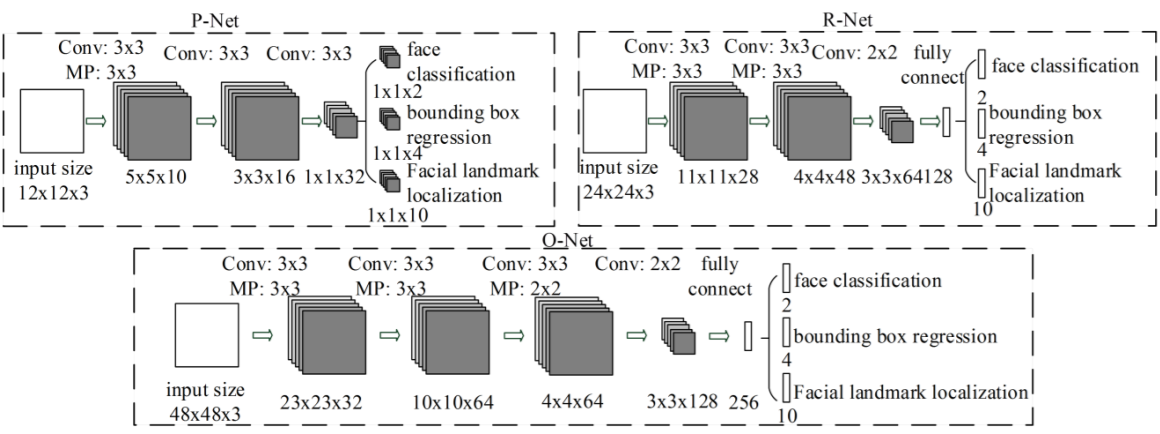

####MobileNetV2<br>
The figure below depicts the architecture of MobileNetV2.  MobileNetV2 builds upon the ideas from MobileNetV1, using depthwise separable convolution as efficient building blocks. However, V2 introduces two new features to the architecture: 1) linear bottlenecks between the layers, and 2) shortcut connections between the bottlenecks. The intuition is that the bottlenecks encode the model’s intermediate inputs and outputs while the inner layer encapsulates the model’s ability to transform from lower-level concepts such as pixels to higher level descriptors such as image categories. Finally, as with traditional residual connections, shortcuts enable faster training and better accuracy [7]. <br> </br>

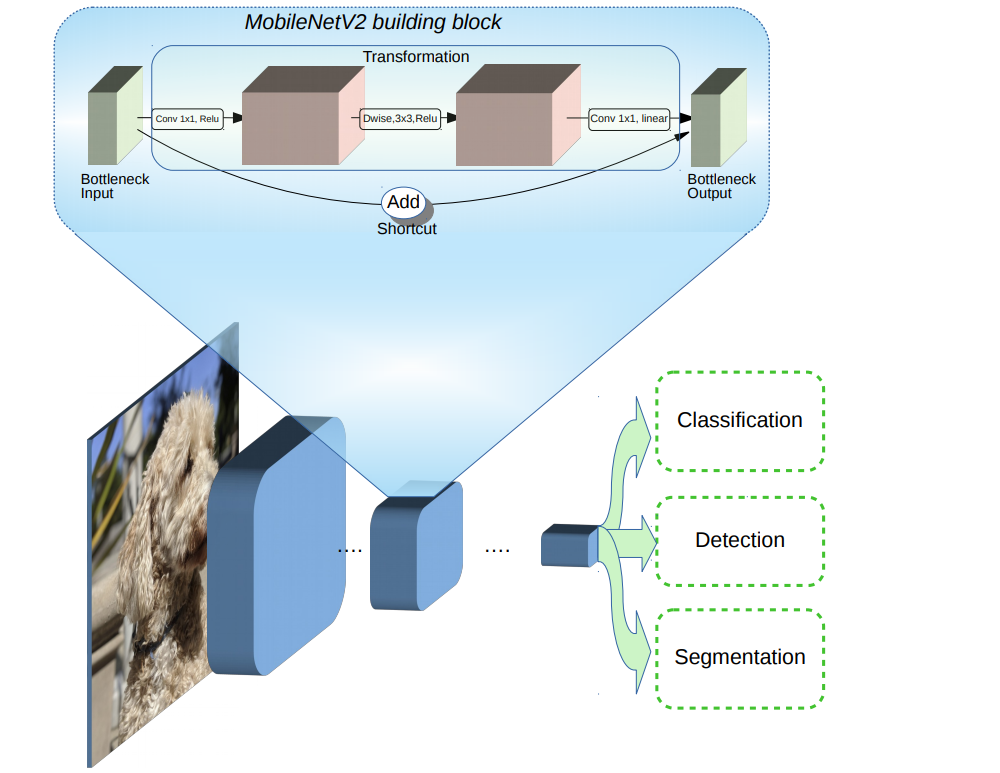

## Data exploration

A key part to successfully train a deep learning model is to have the right and sufficient data. In this project, we are developing a model to identify fake, modified face images from the real ones; therefore, we have found a dataset with 10, 000 real face images and 10, 000 modified fake face images [3]. In the following cells, we use the imshow function from matplotlib to show some of the images. As one can see, it is not that easy to tell these are fake images; that is why we are using deep learning algorithms to help distinguish them.

The [dataset](https://drive.google.com/open?id=1smby8vBB0g8bNtUsQ10OdjF-4FK9k_GS) we use here consists of 20,000 preproccessed images of human faces provided by Gourav Bais.

In [ ]:
fake_path = '/content/drive/MyDrive/Data255_Project_Dataset/train/Fake_Faces'
real_path = '/content/drive/MyDrive/Data255_Project_Dataset/train/Real_Faces'
fake_list = os.listdir(fake_path)
real_list = os.listdir(real_path)

In [ ]:
def plot_instances(n_rows, n_cols, path, set_title=False, title='', figure_size=(10, 8)):
  fig, axs = plt.subplots(n_rows, n_cols, figsize=figure_size)
  for i, ax in enumerate(axs.flat):
    ax.imshow(load_img(path +'/' +os.listdir(path)[i+60]))
    ax.set_axis_off()
  if set_title:
    plt.suptitle(title, fontsize=16)

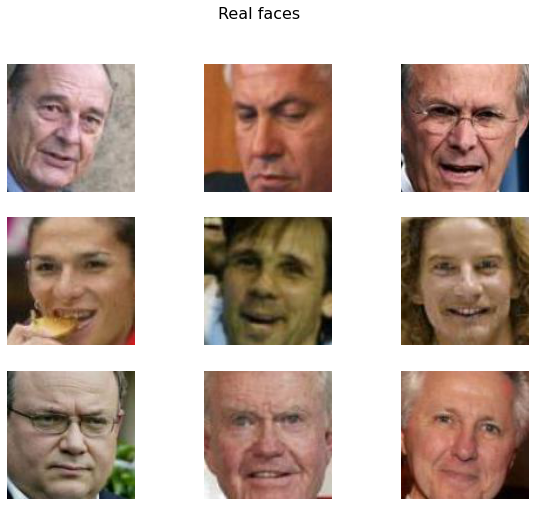

In [ ]:
plot_instances(3, 3, real_path, set_title=True, title='Real faces')

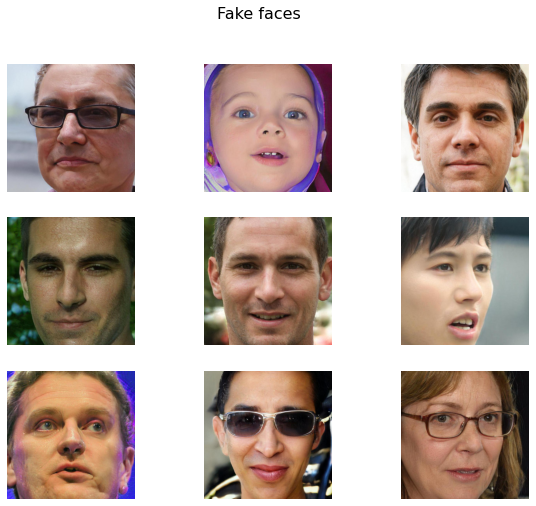

In [ ]:
plot_instances(3, 3, fake_path, set_title=True, title='Fake faces')

### Data Processing

Before model training, we processed image data into NumPy arrays to input in the deep learning models. Keras provides handy image processing methods; for example, the ImageDataGenerator supports image processing to transform images into NumPy arrays and image class labels. It also provides data augmentation options like flipping, rotating, rescaling, and zooming. ImageDataGenerator also allows validation split setting, which is similar to the train test split function in scikit learn. Combined with ImageDataGenerator, the flow_from_directory method will help read images from directories and transform the images into normalized NumPy arrays. There are some options in the flow_from_directory methods, such as batch size and target size. For target size, we can set the desired output image array sizes, and if no target size is set, the original image size will be used; the setting of target size will depend on the models; hence, different models might have different target size requirements. With smaller target sizes, model training will be faster, but the trade-off is that the model will get images with lower resolution. One argument in the flow_from_directory method to be noted is the shuffle setting. If the shuffle is set to True (default is True), the generator will randomly read the images from the directory. However, when evaluating the model result with the test dataset, we will want the images to be in the same order every time the generator is being called to compare true labels and the predicted labels. Therefore, it is crucial to set shuffle to False for the test_generator.

One drawback of the ImageDataGenerator method is that it only allows training and validation split, without separating a testing set. To split data into training, validation, and testing set, we have found a Python package called splitfolders, which take images with specific folder structures and split them into train/validation and test sets folders. After splitting the images in the directory, we can then read them with the flow_from_directory method.

The resulting data object will be directory iterators, which yields tuples of x and y, where x will have the image arrays, and y will hold the class labels of the images.

In [ ]:
#@title
import numpy as np
import pandas as pd

import os

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import MobileNetV2
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten
from keras.optimizers import Adam
import splitfolders

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
! pip install split-folders
import splitfolders
splitfolders.ratio(path, output=output_path, ratio=(0.8, 0.1, 0.1), group_prefix=None)

Copying files: 20000 files [04:52, 68.40 files/s]


In [ ]:
train_path = '/content/drive/MyDrive/Data255_Project_Dataset/train'

data_gen = ImageDataGenerator(rescale=1./255)

training_set = data_gen.flow_from_directory(train_path,
                                            class_mode='binary',
                                            shuffle=True,
                                            target_size=(96,96),
                                            batch_size=64,
                                           )

training_set.class_indices

In [ ]:
valid_path = '/content/drive/MyDrive/Data255_Project_Dataset/val'

valid_set = data_gen.flow_from_directory(valid_path,
                                         class_mode='binary',
                                         shuffle=True,
                                         target_size=(96,96),
                                         batch_size=64
                                         )

valid_set.class_indices

In [ ]:
test_path = '/content/drive/MyDrive/Data255_Project_Dataset/test'

test_set = data_gen.flow_from_directory(test_path,
                                        class_mode='binary',
                                        target_size=(96,96),
                                        batch_size=64
                                       )

test_set.class_indices

## Solution Implementation and Evaluation

Our team had tried quite a few different ways. In the below sections, you will see CNN, MobileNetV2, and MobileNetV2 Subtraction.
<br>
<br>
**CNN**
<br>
The first model here is a CNN model with three convolutional layers, three max pooling layers, and a fully connected layer. In the beginning the validation accuracy is lower than training accuracy, so we added dropout layers to improve training results. In the confusion matrix and classification report, we can see this model performs exceptionally well with classifying both real and fake images with 90% overall accuracy.

---

**MobileNetV2**
<br>
We did not get an outstanding result for MobileNetV2, applying transfer learning, adding pooling and drop out layers, and early stopping. As shown in the following section, the accuracy is about 0.5. Moreover, the reasons could be as follows:
* MovileNetV2, a lightweight model, tends to focus more on efficiency
* Negative transfer, Transfer learning only works if the initial and target problems are similar enough for the first round of training to be relevant
* The ease of overfitting. For transfer learning, the amounts of training data should be a way that will not overfit the model
---

**MobileNetV2 Subtraction**
<br>
Hence, MobileNetV2 Subtraction was applied. What we did differently is decreasing the training set to 2000 and the epochs to 2. Furthermore, the accuracy increased to 0.97.



### CNN with 3 Convolutional Layers

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (200,200,3), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)      

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(train_generator,
                              validation_data = validation_generator,
                              epochs = 30, callbacks=[es])

Epoch 1/30
250/250 [==============================] - 3672s 15s/step - loss: 0.5519 - accuracy: 0.7586 - val_loss: 0.1163 - val_accuracy: 0.9582
Epoch 2/30
250/250 [==============================] - 120s 479ms/step - loss: 0.1140 - accuracy: 0.9567 - val_loss: 0.0891 - val_accuracy: 0.9615
Epoch 3/30
250/250 [==============================] - 118s 472ms/step - loss: 0.0931 - accuracy: 0.9657 - val_loss: 0.0651 - val_accuracy: 0.9728
Epoch 4/30
250/250 [==============================] - 118s 471ms/step - loss: 0.0542 - accuracy: 0.9792 - val_loss: 0.0484 - val_accuracy: 0.9810
Epoch 5/30
250/250 [==============================] - 117s 469ms/step - loss: 0.0437 - accuracy: 0.9840 - val_loss: 0.0812 - val_accuracy: 0.9675
Epoch 6/30
250/250 [==============================] - 117s 470ms/step - loss: 0.0487 - accuracy: 0.9796 - val_loss: 0.0541 - val_accuracy: 0.9810
Epoch 7/30
250/250 [==============================] - 117s 469ms/step - loss: 0.0371 - accuracy: 0.9865 - val_loss: 0.0500 - 

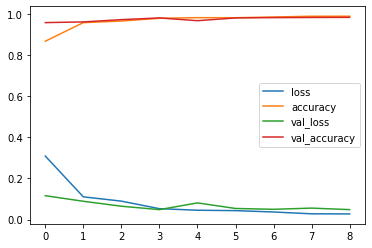

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(history.history, columns=history.history.keys())
plt.plot(df)
plt.legend(history.history.keys())
plt.show()

#### Evaluate

In [ ]:
y_true = validation_generator.classes
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
Y_pred = model.predict(validation_generator)
y_pred = (Y_pred > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

conf = pd.DataFrame(confusion_matrix(y_true, y_pred), index=['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]'])

print(classification_report(y_true, y_pred))
conf

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1000
           1       0.87      0.94      0.90      1000

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



,Pred[0],Pred[1]
True[0],861,139
True[1],62,938


### MobileNetV2

In [ ]:
mobilenet = MobileNetV2(input_shape=(96, 96, 3),
                        include_top=False,
                        weights='imagenet'
                       )

model = tf.keras.models.Sequential([mobilenet,
                                    GlobalAveragePooling2D(),
                                    Dense(128, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(1, activation='sigmoid')
                                   ])
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(x=training_set, epochs=20, validation_data=valid_set, callbacks=[callback], verbose=2)

##### Evaluate

In [ ]:
y_true = test_set.classes
y_pred = model.predict(test_set)
y_pred = y_pred.astype('int').reshape(-1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

### MobileNetV2 Subtraction

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(x=valid_set, epochs=2, verbose=2)

Epoch 1/2
32/32 - 11s - loss: 0.0263 - accuracy: 0.9935
Epoch 2/2
32/32 - 11s - loss: 0.0197 - accuracy: 0.9945


##### Evaluate

In [ ]:
y_pred = model.predict(test_set)
y_pred_int = y_pred.astype('int').reshape(-1)

In [ ]:
print(confusion_matrix(y_true, y_pred_int))
print(classification_report(y_true, y_pred_int))

[[974  26]
 [ 38 962]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1000
           1       0.97      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



## Impacts & Future Improvements

#### **Impacts**
As mentioned in the previous parts, there are pros and cons for the deep fake technology. The potential consequence of DeepFake technology could be more than one can imagine. Suppose it is not controlled promptly. In that case, its effects could be more devastating, and the use of AI-based technologies will become a severe threat to our society. Even one of the leading social media networking sites, Facebook, said "they are actively working to combat the threat of Deepfakes. They have deployed an engineering team to detect the manipulated videos, photos, or videos and allow users to report such contents to their team. [8]
<br>

With our team's work so far, we believe that deepfake detection will positively impact our society in the following ways: Research contribution; Ethical communities, anti-threats; and Business opportunities.

Research Contribution:
* Our study could contribute to the researchers for transfer learning on the mobile device

Ethical Communities:
* Help online communities be more ethical
* Prevent illegal or immoral activities caused by deep-fake

Anti-Threats
* Maximize the protection for politicians and celebrities by auto-detecting deep fake porn, political campaigns, commercials

Business Opportunities
* Business opportunities in fighting against media forgeries and fake news
* Anti-threat protection services for well-known people
* Education services to teach people how to identify deep-fake


#### **Future Improvements**
When speaking about business opportunities, there will definitely be an improvement for both technology and business standpoints that we could work on.
<br>
From a **technology standpoint**, our team could try different models and see if they could increase the accuracy, quality, and scalability. If time permits, we could also help society generate a system (an app for mobile devices or a website online) across the online communities that auto-detect DeepFake images instantly.
<br>
From a **business standpoint**, our team could also work on the Video and Audio parts created with the DeepFake technologies in the long run. We could detect the fake videos through the face and expressions of the targeted person from different angles. Additionally, we could use sound annotation for speech recognition. The idea may seem a bit vague at this point, but our team believes that countless efforts are needed to impact our society positively.


## References

[1] Tolosana, Ruben, et al. "Deepfakes and beyond: A survey of face manipulation and fake detection." Information Fusion 64 (2020): 131-148.

[2] Vaccari, Cristian, and Andrew Chadwick. "Deepfakes and disinformation: Exploring the impact of synthetic political video on deception, uncertainty, and trust in news." Social Media+ Society 6.1 (2020): 2056305120903408.

[3] Fake Face Image Classification. (2020). Retrieved 8 May 2021, from https://medium.com/analytics-vidhya/fake-face-image-classification-5a4151db9b8d

[4] T. T. Nguyen, C. M. Nguyen, D. T. Nguyen, D. T. Nguyen and S. Nahavandi, "Deep learning for deepfakes creation and detection", 2019.

[5] “Three Types of Deepfake Detection,” Lionbridge AI, 18-Nov-2020. [Online]. Available: https://lionbridge.ai/articles/three-types-of-deepfake-detection/. [Accessed: 08-May-2021].

[6] G. Bais, “Fake Face Image Classification,” Medium, 15-Jul-2020. [Online]. Available: https://medium.com/analytics-vidhya/fake-face-image-classification-5a4151db9b8d. [Accessed: 08-May-2021].

[7] S.-H. Tsang, “Review: MobileNetV2 - Light Weight Model (Image Classification),” Medium, 01-Aug-2019. [Online]. Available: https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c. [Accessed: 08-May-2021].

[8]Box, B. B. (2020, February 3). How Deepfake Technology Impact the People in Our Society? Medium. https://becominghuman.ai/how-deepfake-technology-impact-the-people-in-our-society-e071df4ffc5c.